In [18]:
import os
import sys
import numpy as np 
import pandas as pd
from subprocess import call
import urllib
import os, requests, zipfile#, StringIO
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.manifold import TSNE
sys.path.insert(0, '../')

In [2]:
training_data_fpath = '../2019-741_Data/training_data.txt'

In [3]:
training_data_pd = pd.read_csv(training_data_fpath, sep=" ", header=None) 

In [4]:
training_data_pd

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,8400.0,qid:1,1:0.1904762,2:0.093344346,3:6.4657204E-4,4:9.596929E-4,5:9.519016E-4,6:0.08552632,7:0.06896552,8:0.0859375,...,49:0.376386,50:0.1,51:1.0,52:0.728105,53:0.3,54:0.9,55:0.5,56:0.75,57:0.0,58:0.5
1,2000.0,qid:1,1:0.52380955,2:0.036228463,3:8.07117E-4,4:9.596929E-4,5:0.0010688262,6:0.016447369,7:0.02586207,8:0.0078125,...,49:0.330698,50:0.033333,51:0.8,52:0.75,53:0.75,54:0.75,55:0.454545,56:0.568182,57:0.09091,58:0.136364
2,1200.0,qid:1,1:0.33333334,2:0.054165684,3:7.273752E-4,4:9.596929E-4,5:9.526231E-4,6:0.0756579,7:0.12068965,8:0.0703125,...,49:0.406976,50:0.136364,51:1.0,52:0.759409,53:0.3,54:0.95,55:0.4375,56:0.59375,57:0.125,58:0.1875
3,4200.0,qid:1,1:0.47619048,2:0.08803399,3:5.2222965E-4,4:9.596929E-4,5:6.259569E-4,6:0.009868421,7:0.01724138,8:0.2109375,...,49:0.178634,50:0.0625,51:0.4,52:0.69907403,53:0.3,54:0.875,55:0.727273,56:0.409091,57:0.454546,58:0.181818
4,2200.0,qid:1,1:0.23809524,2:0.053339627,3:6.8005425E-4,4:9.596929E-4,5:8.906877E-4,6:0.07236842,7:0.01724138,8:0.0078125,...,49:0.370536,50:0.1,51:0.7,52:0.87063503,53:0.8,54:0.9,55:0.0,56:0.5,57:1.0,58:0.0
5,1700.0,qid:1,1:0.33333334,2:0.049681377,3:7.184223E-4,4:9.596929E-4,5:0.00101134,6:0.04276316,7:0.03448276,8:0.0625,...,49:0.381555,50:0.033333,51:0.8,52:0.7025,53:0.6,54:0.8125,55:0.0,56:0.5,57:1.0,58:0.0
6,1900.0,qid:1,1:0.42857143,2:0.051923532,3:7.8739366E-4,4:9.596929E-4,5:0.0010745738,6:0.039473683,7:0.02586207,8:0.0078125,...,49:0.410714,50:0.1,51:0.7,52:0.75,53:0.6,54:0.9,55:0.0,56:0.5,57:1.0,58:0.0
7,1700.0,qid:1,1:0.42857143,2:0.06584848,3:7.571997E-4,4:9.596929E-4,5:0.0010910754,6:0.02631579,7:0.02586207,8:0.0859375,...,49:0.352986,50:0.136364,51:0.7,52:0.81127,53:0.6,54:0.95,55:0.454545,56:0.568182,57:0.09091,58:0.136364
8,987.0,qid:1,1:0.33333334,2:0.021831485,3:9.694122E-4,4:9.596929E-4,5:0.0012435892,6:0.019736841,7:0.01724138,8:0.0,...,49:0.454762,50:0.3,51:1.0,52:0.783333,53:0.6,54:0.9,55:0.9,56:0.65,57:0.8,58:0.3
9,1400.0,qid:1,1:0.47619048,2:0.15116829,3:6.4946077E-4,4:9.596929E-4,5:9.78283E-4,6:0.0756579,7:0.02586207,8:0.1015625,...,49:0.376964,50:0.0625,51:0.8,52:0.61809003,53:0.0,54:0.95,55:0.452273,56:0.540341,57:0.095454,58:0.080682


In [5]:
len(training_data_pd)

20005

In [6]:
int(training_data_pd.loc[0][1].split(':')[-1])

1

In [7]:
print(float(training_data_pd.loc[0][2].split(':')[-1]))
print(training_data_pd.loc[0][2].split(':')[-1])

0.1904762
0.1904762


In [8]:
def parse_raw_txt_pd(single_row):
    num_shares = single_row[0]
    week = int(single_row[1].split(':')[-1])
    features = []
    for i in range(2,len(single_row)):
        feat_i = float(single_row[i].split(':')[-1])
        features.append(feat_i)
    return num_shares, week, np.asarray(features)

In [9]:
shares, week_id, X = parse_raw_txt_pd(training_data_pd.loc[0])

In [10]:
len(X)

58

In [11]:
Y_training = []
week_ids = []
X_training = []
for i in range(0, len(training_data_pd)):
    y_shares, week_id, x_feats = parse_raw_txt_pd(training_data_pd.loc[i])
    Y_training.append(y_shares)
    week_ids.append(week_id)
    X_training.append(x_feats)

In [12]:
X_training = np.asarray(X_training)
Y_training = np.asarray(Y_training)
week_ids = np.asarray(week_ids)

#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X_training)
X_embedded.shape

np.save('X_tsne', X_embedded)

In [13]:
X_embedded = np.load('X_tsne.npy')

In [14]:
X_training.shape

(20005, 58)

In [15]:
Y_training.mean() + Y_training.std()

14817.959981496639

In [16]:
X_embedded_above_avg = X_embedded[np.where(Y_training > (Y_training.mean() + Y_training.std()) )]
X_embedded_below_avg = X_embedded[np.where(Y_training < Y_training.mean())]

In [19]:
np.unique(week_ids)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

/home/kathleen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


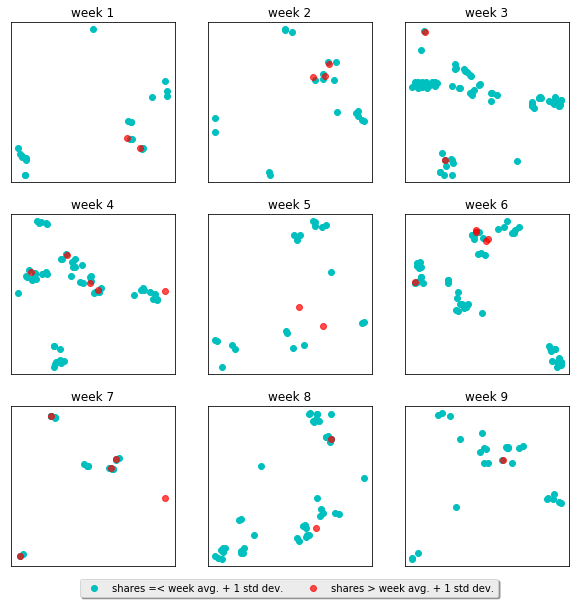

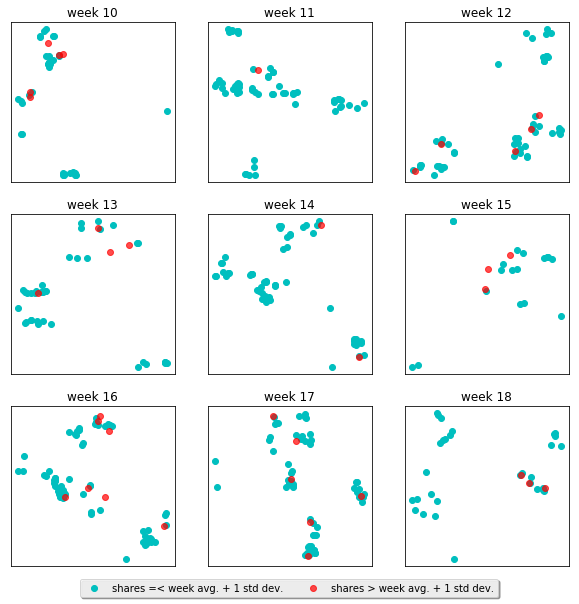

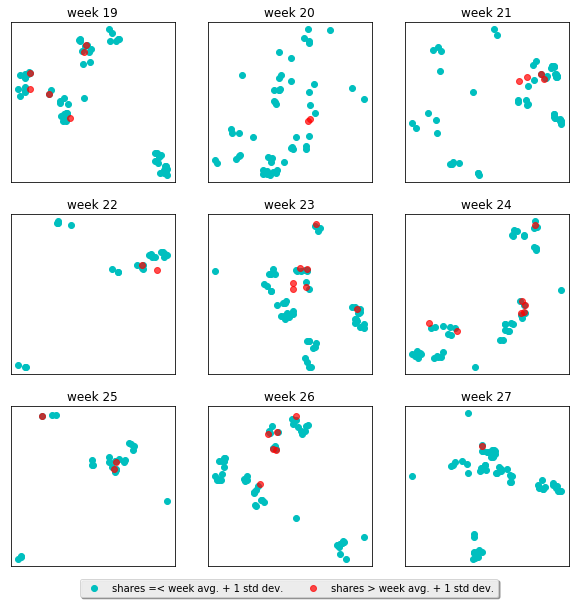

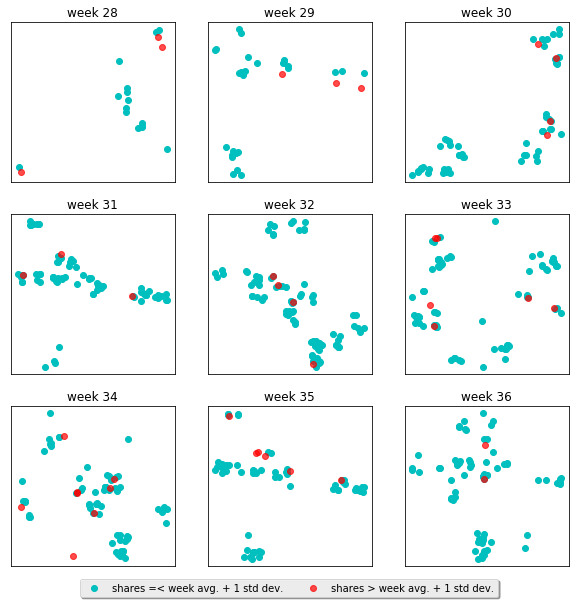

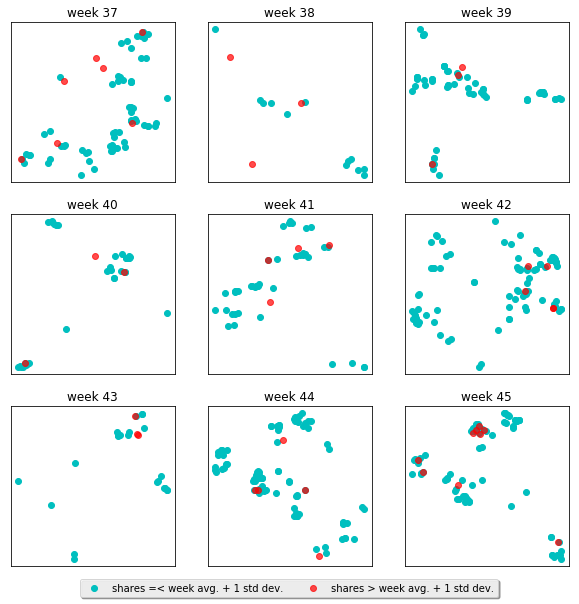

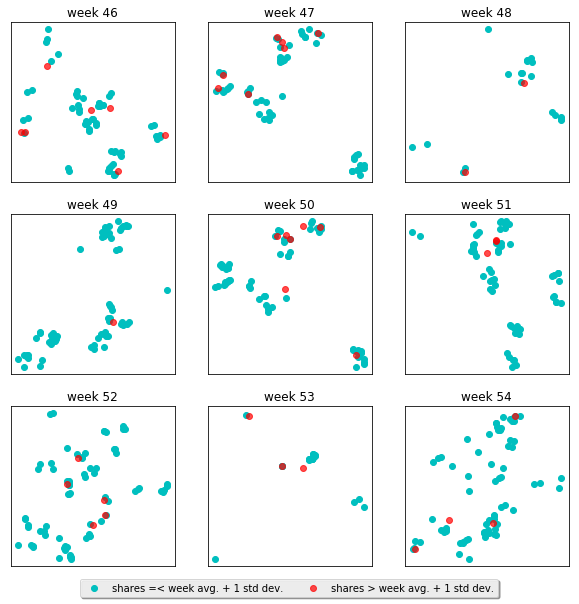

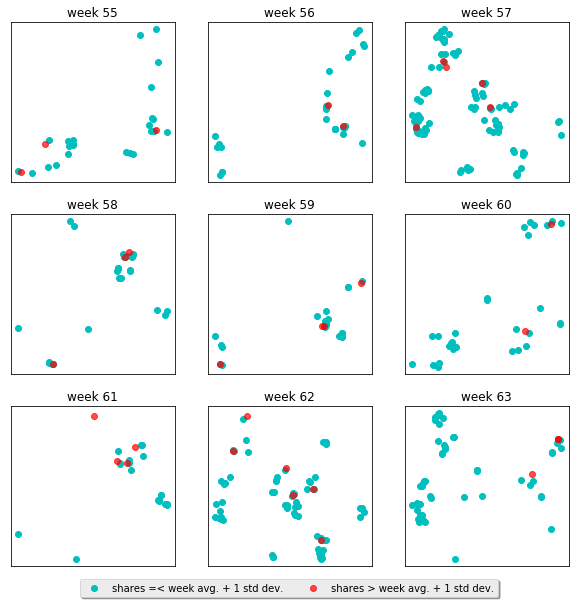

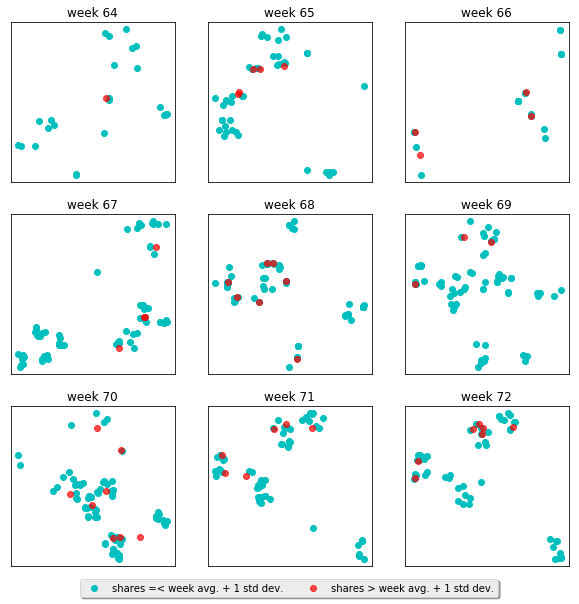

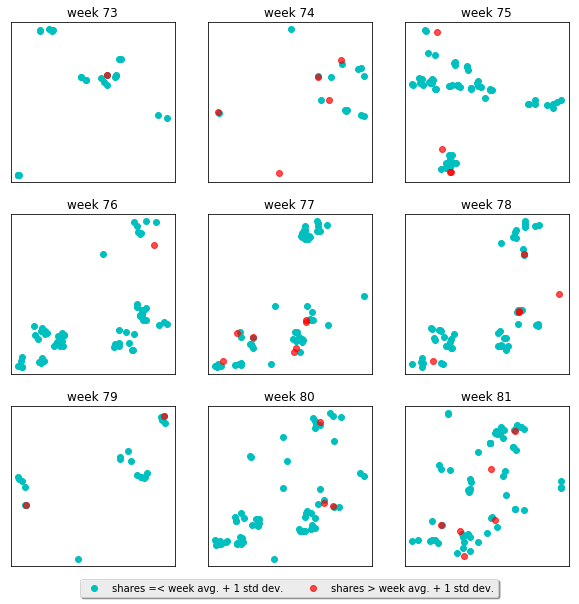

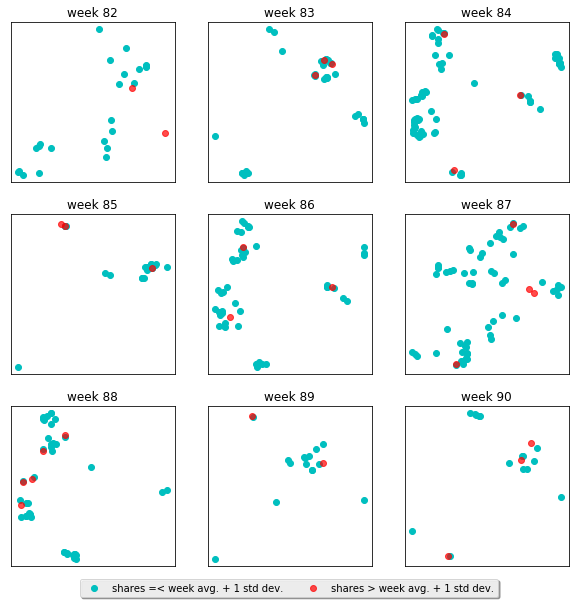

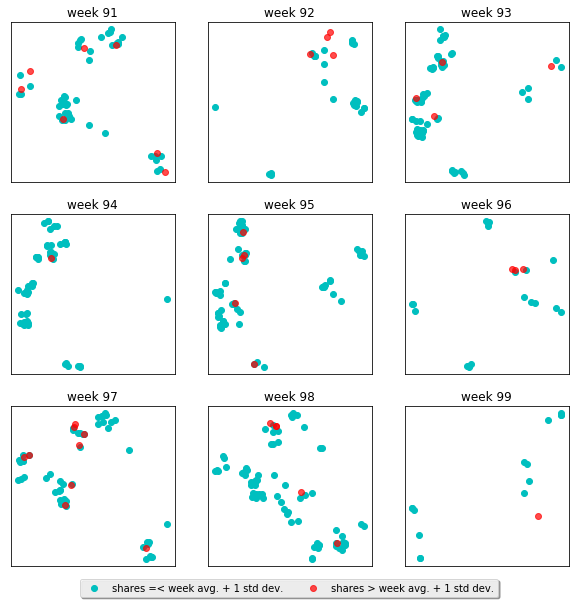

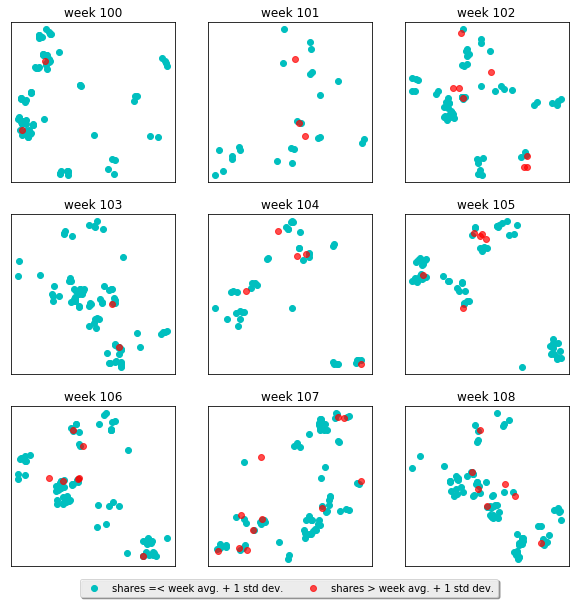

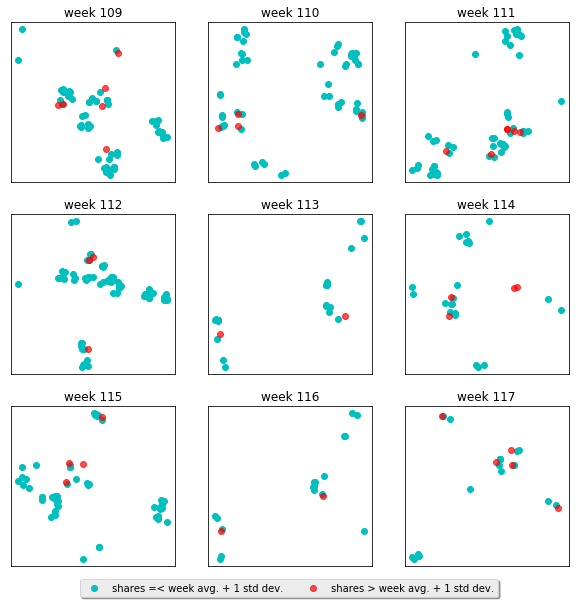

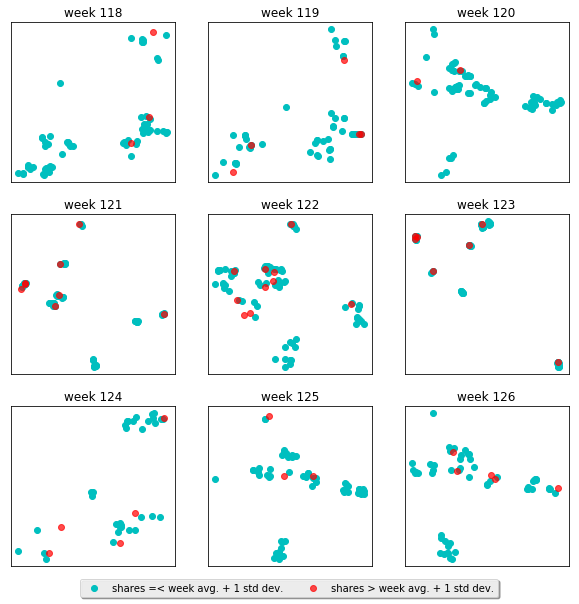

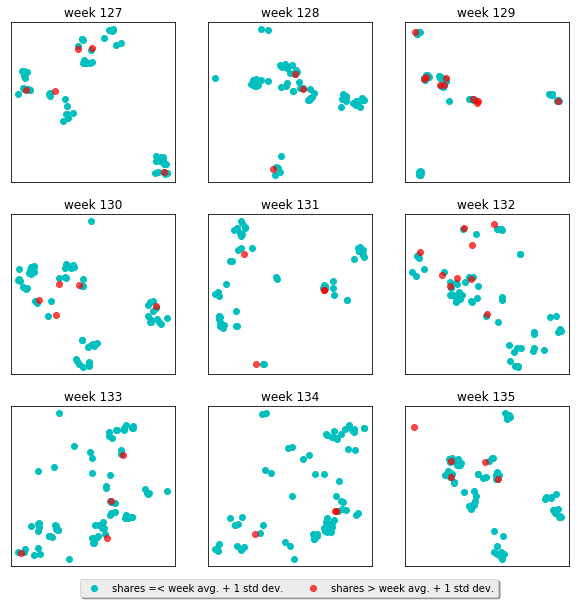

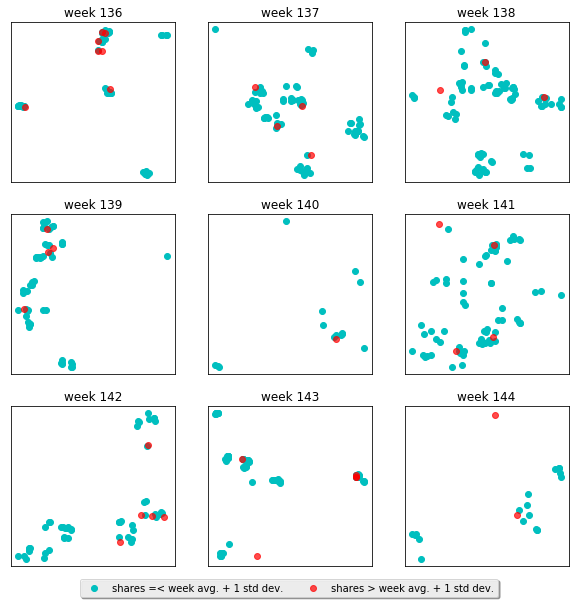

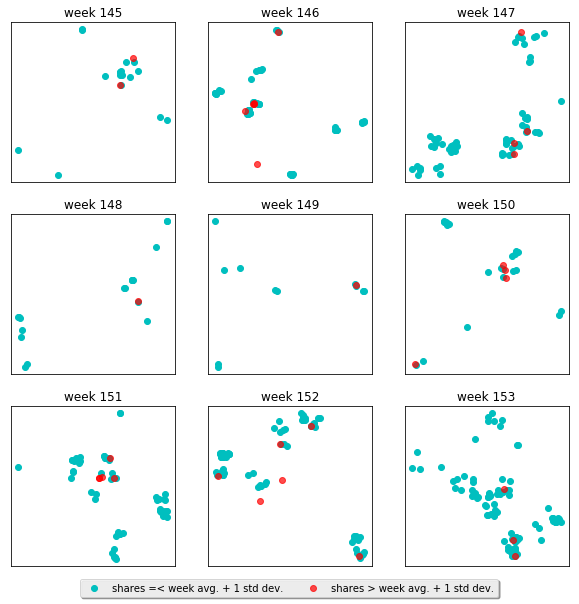

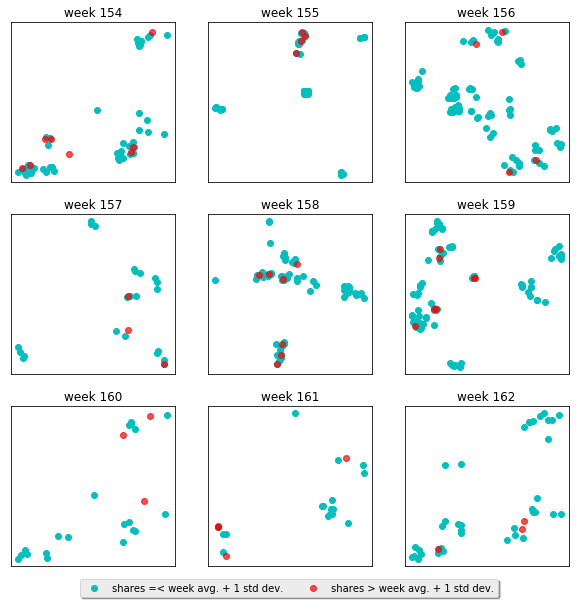

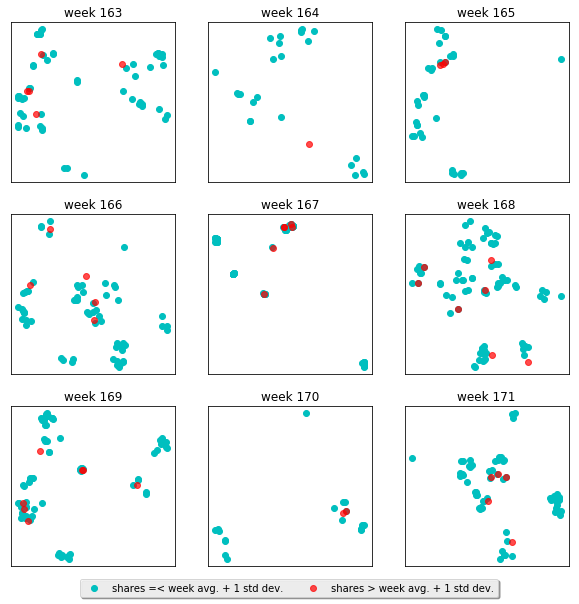

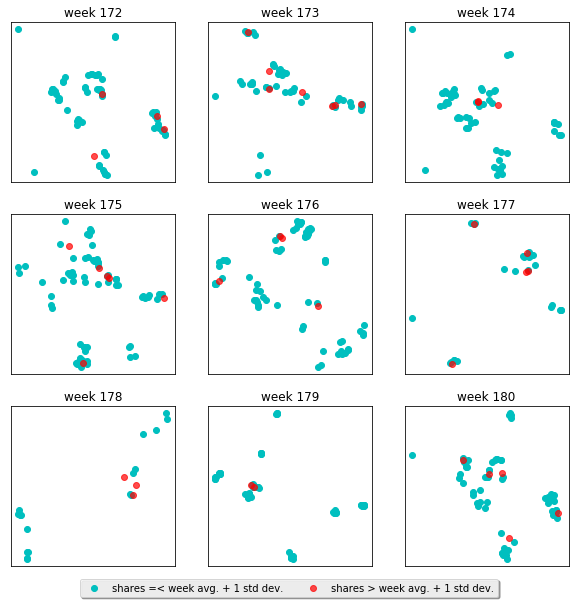

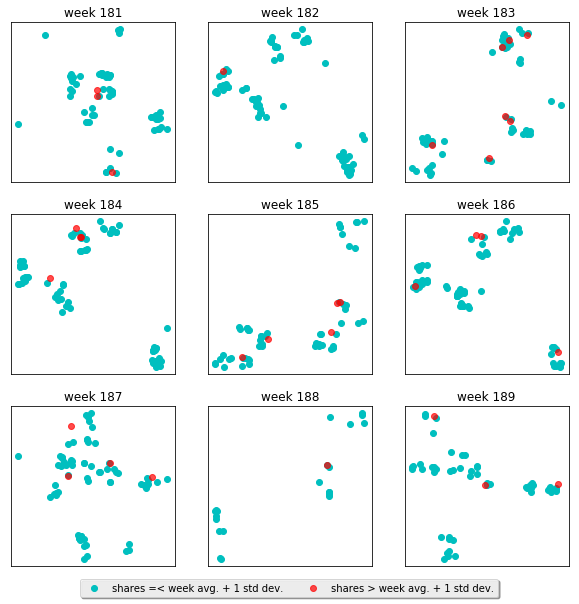

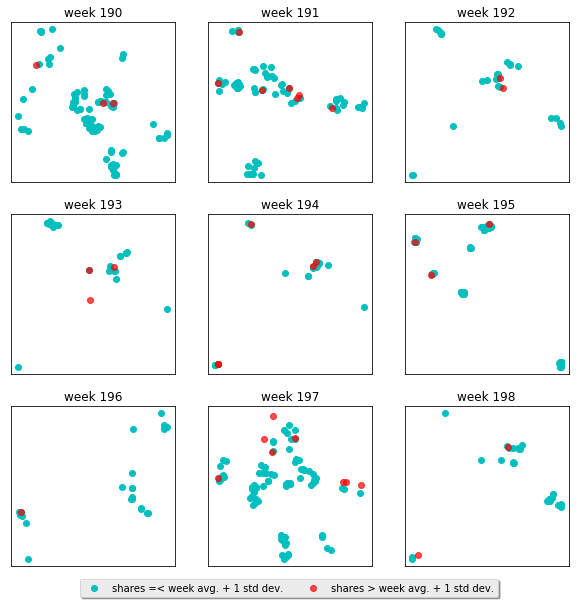

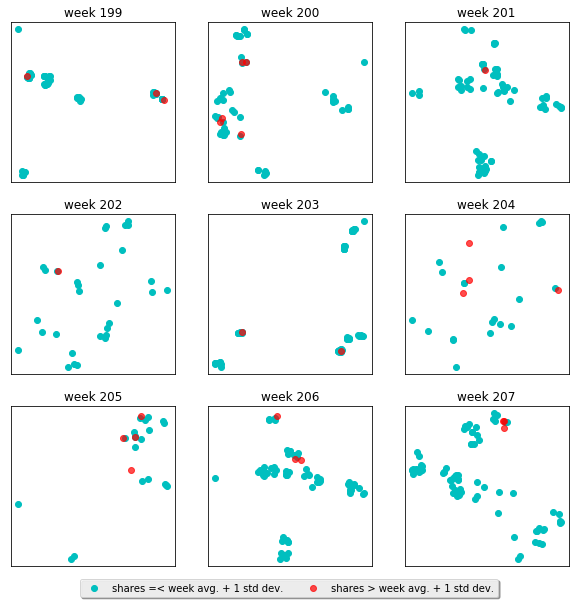

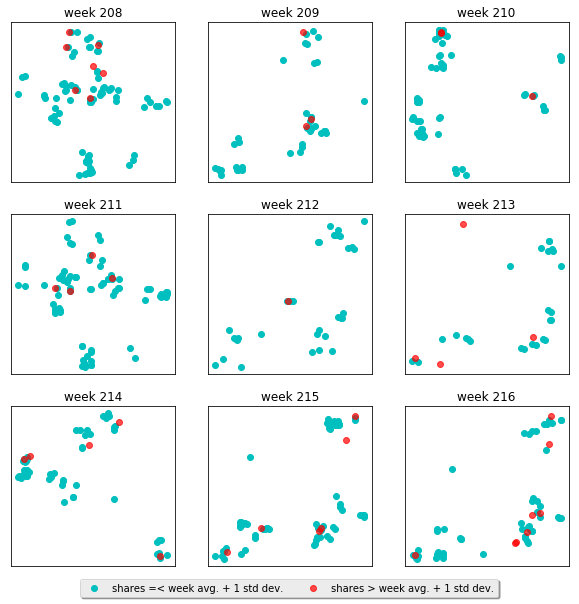

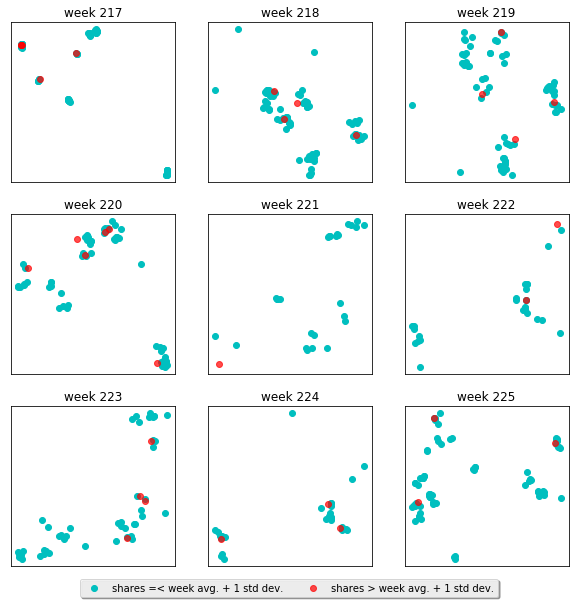

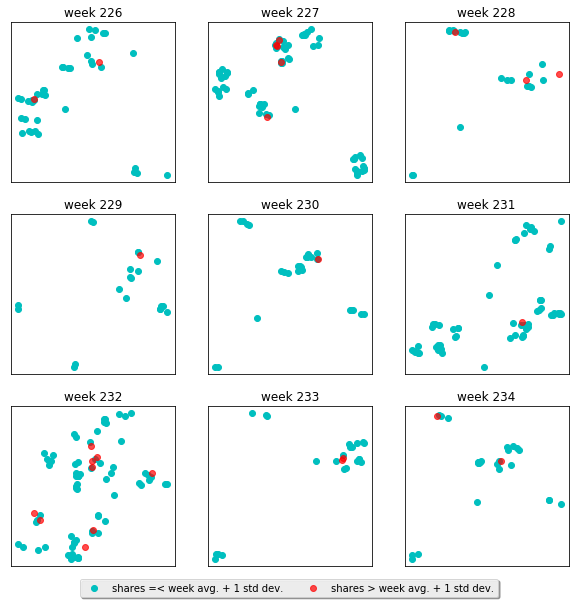

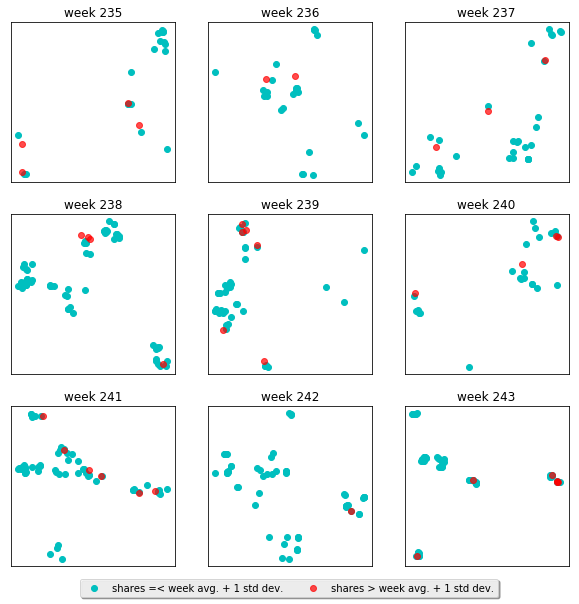

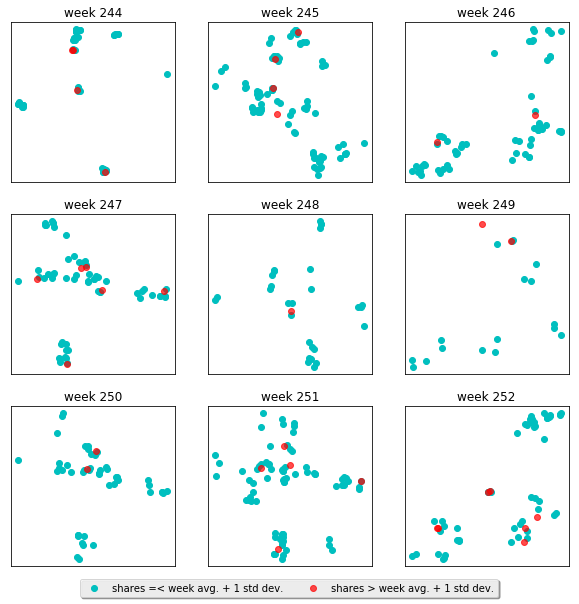

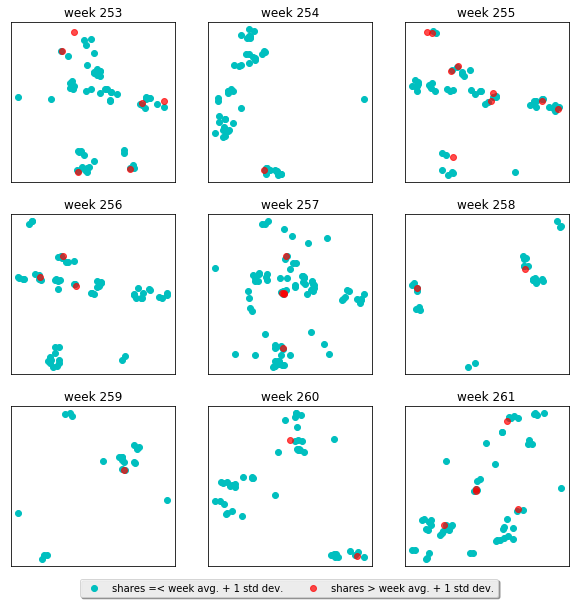

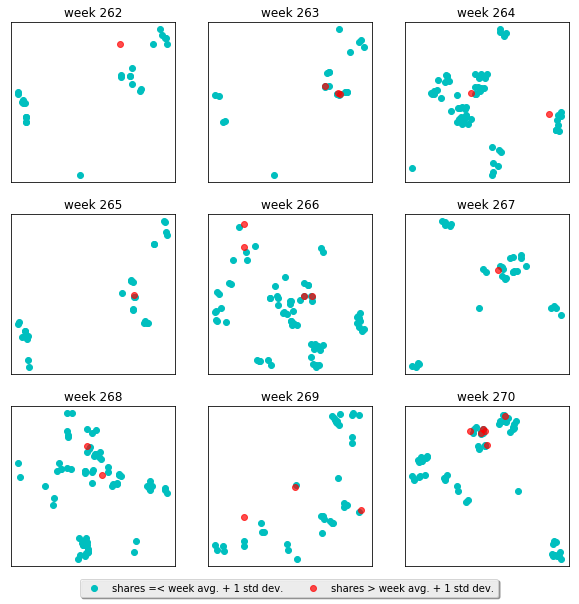

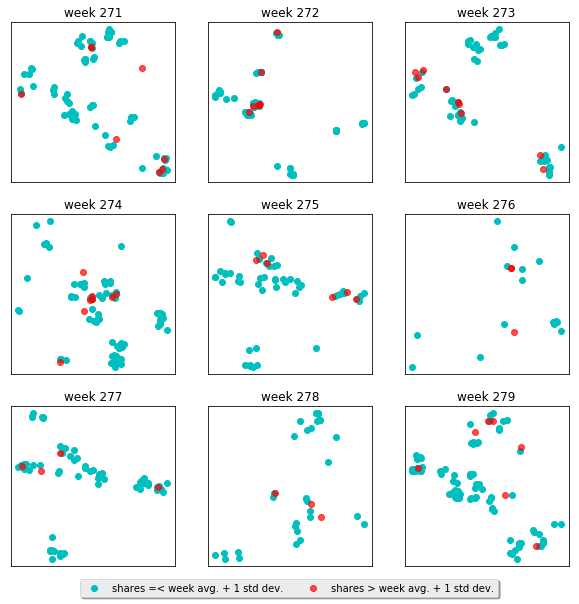

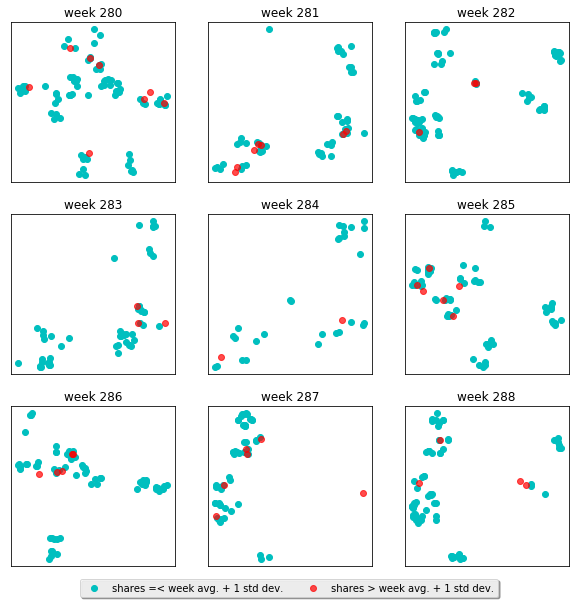

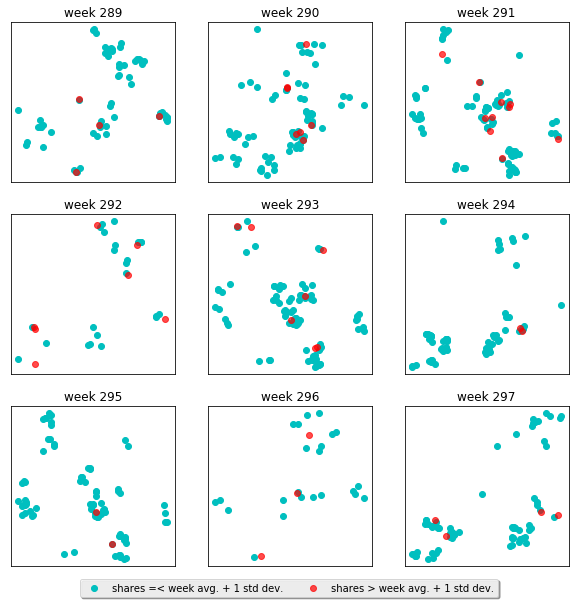

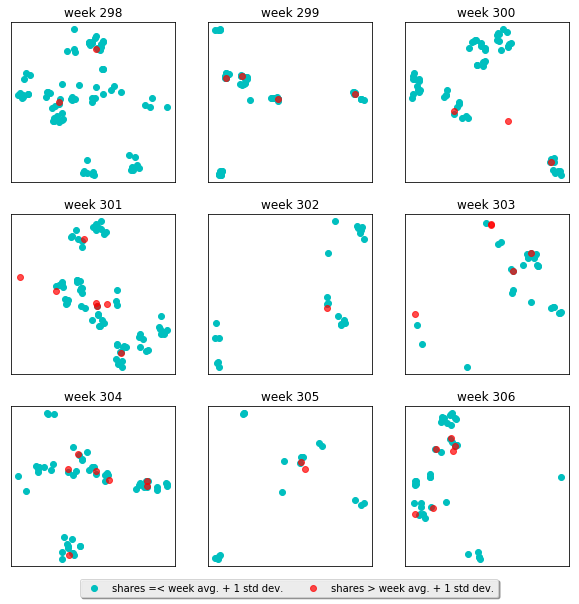

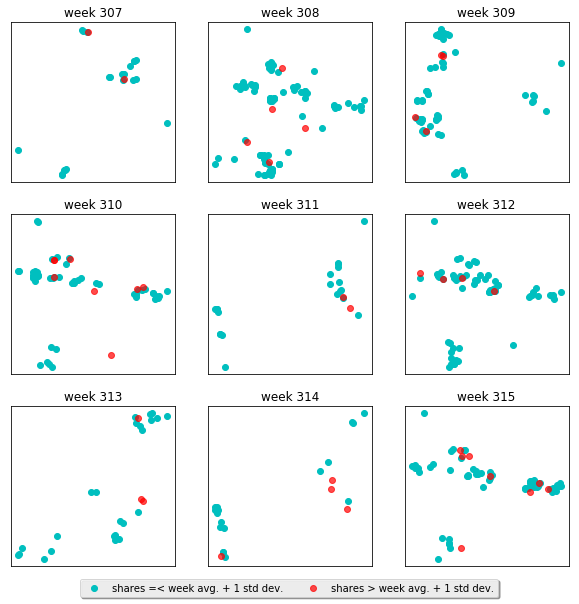

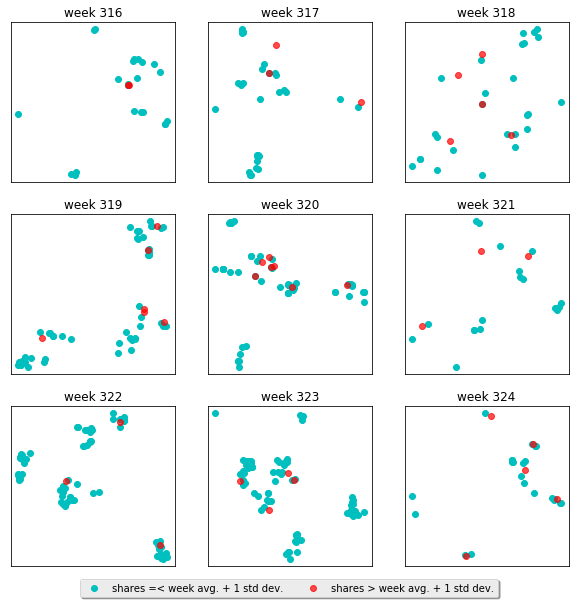

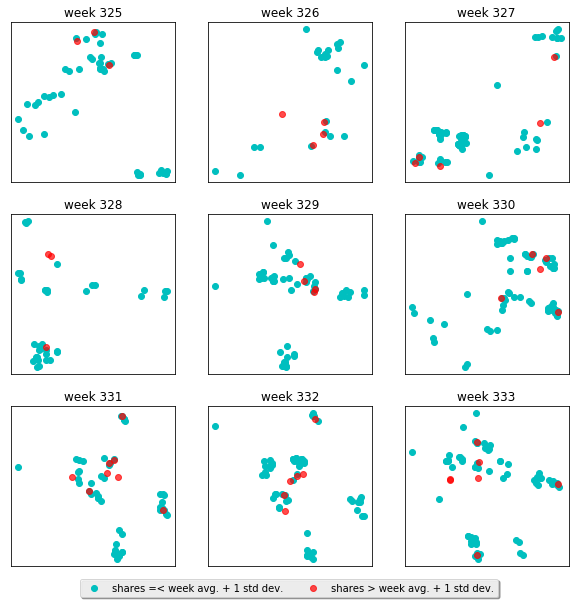

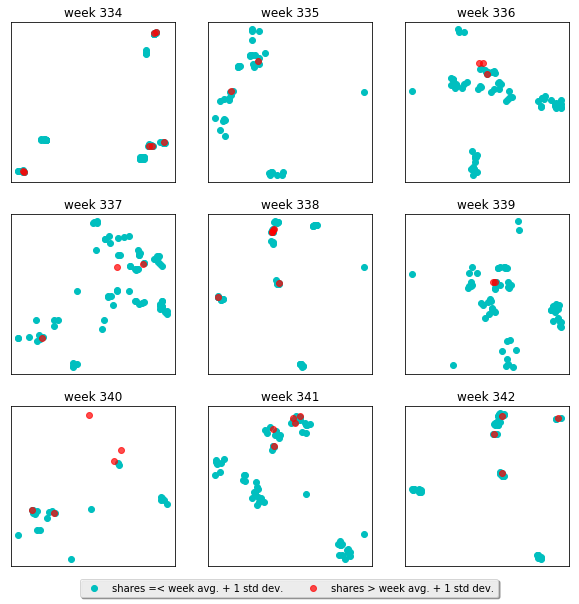

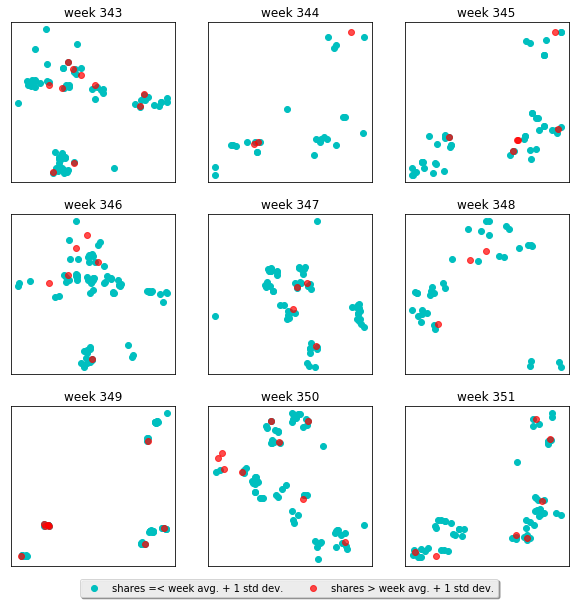

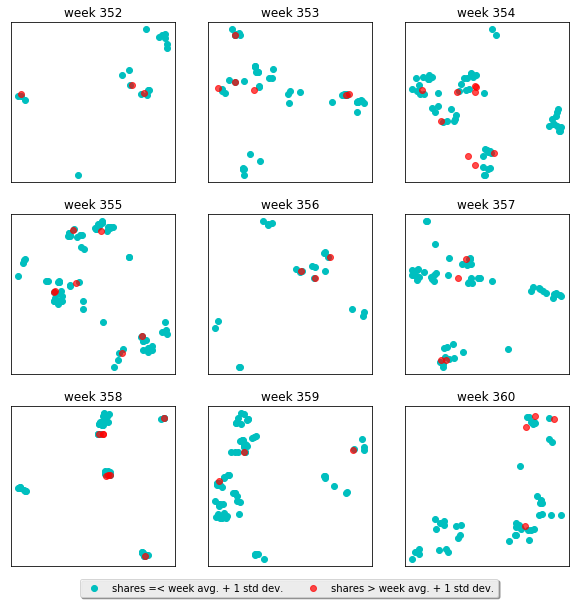

In [50]:
week =1
for i in range(0, 40):
    plt.figure(figsize=(10,10)) 
    #plt.title('TSNE embeddings')
    for j in range(1,10):
        plt.subplot(3,3,j)
        plt.title('week ' + str(week))
        X_emd_week = X_embedded[np.where(week_ids == week)]
        Y_training_week = Y_training[np.where(week_ids == week)]
        X_embedded_above_avg = X_emd_week[np.where(Y_training_week > (Y_training_week.mean() + Y_training_week.std()) )]
        X_embedded_below_avg = X_emd_week[np.where(Y_training_week <= (Y_training_week.mean() + Y_training_week.std()) )]
        #plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 1)#cmap=plt.cm.rainbow)
        plt.scatter(X_embedded_below_avg[:,0], X_embedded_below_avg[:,1], c='c', alpha=1, label = 'shares =< week avg. + 1 std dev.')
        plt.scatter(X_embedded_above_avg[:,0], X_embedded_above_avg[:,1], c='r', alpha=0.7, label='shares > week avg. + 1 std dev.')
        plt.xticks([])
        plt.yticks([])
        week = week + 1
        
    plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.6, -0.05)) 
    plt.savefig('weeks_'+str(week-9)+'-'+str(week-1))

In [17]:
X_embedded_below_avg.shape

(16046, 2)

In [18]:
X_training.min()

0.0

In [19]:
type(X_training)

numpy.ndarray

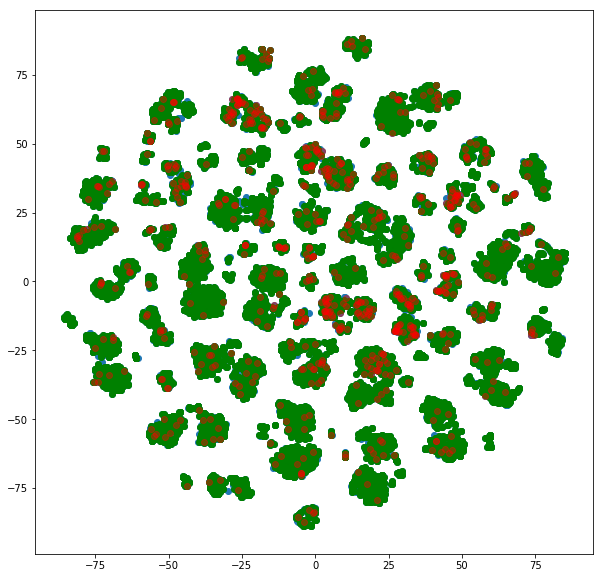

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 1)#cmap=plt.cm.rainbow)
plt.scatter(X_embedded_below_avg[:,0], X_embedded_below_avg[:,1], c='g', alpha=1)
plt.scatter(X_embedded_above_avg[:,0], X_embedded_above_avg[:,1], c='r', alpha=0.4)